In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('housing.csv')
print(df.head())
print(df.describe())
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])
print(df_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
          longitude      latitude  housing_median_age   total_rooms  \
coun

In [10]:
X = df_encoded[['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households', 'median_income','ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']].dropna()
y = df_encoded.loc[X.index,'median_house_value']

In [11]:
Scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
X = Scaler.fit_transform(X)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model = LinearRegression()

print("Shape of train sets", X_train.shape, y_train.shape)
print("Shape of test sets", X_test.shape, y_test.shape)

model.fit(X_train,y_train)

Shape of train sets (16346, 105) (16346,)
Shape of test sets (4087, 105) (4087,)


LinearRegression()

In [13]:
predictions = model.predict(X_test)
error = mean_squared_error(y_test,predictions)
R2 = r2_score(y_test,predictions)
MAE = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", error)
print("Mean Absolute Error:", MAE)
print("R2 SCORE: ",R2)

Mean Squared Error: 3975991124.8353314
Mean Absolute Error: 45062.43999597836
R2 SCORE:  0.7092549497487006


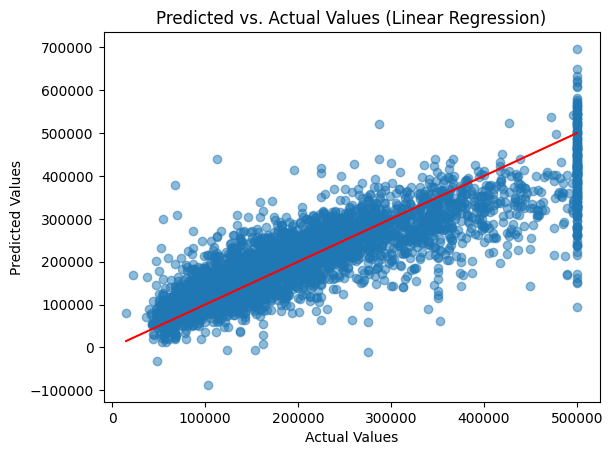

In [15]:
plt.scatter(y_test, predictions, alpha=0.5)
plt. plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear Regression)")
plt.savefig('predictions_degree2.png')
plt.show( )